In [1]:
import mysql.connector
import json
import matplotlib.pyplot as plt
from decimal import Decimal
import pandas as pd

In [2]:
config = {
    'user': 'root',
    'password': '---',
    'host': 'localhost',  # Or your remote server's IP/domain
    'database': 'NFL_Combine_database',
    'raise_on_warnings': True
}

In [3]:
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

cursor.execute("""
    SELECT ProBowl_Age
    FROM nfl_combine_data
    WHERE ProBowl_Age != '[]'
""")

# Fetch all the rows in a list of lists.
results = cursor.fetchall()

cursor.close()
cnx.close()

In [4]:
print(results)

[('[25, 26, 29, 30, 31, 32]',), ('[25, 26, 27]',), ('[29]',), ('[34]',), ('[25, 26]',), ('[24, 22, 23, 25]',), ('[27]',), ('[29]',), ('[34, 35, 36, 37]',), ('[30, 33, 34]',), ('[25]',), ('[32]',), ('[27]',), ('[27, 28, 29]',), ('[25]',), ('[26]',), ('[26]',), ('[28, 31, 32, 33, 34]',), ('[27, 28]',), ('[28, 30]',), ('[23]',), ('[27, 28]',), ('[33, 35]',), ('[24]',), ('[26, 27]',), ('[32]',), ('[24, 25, 26, 27, 28, 29, 31, 34, 35, 36, 37]',), ('[24, 26, 27, 28, 29, 30]',), ('[25]',), ('[24]',), ('[22, 25, 27, 28, 29, 30, 31, 33, 35]',), ('[28]',), ('[32, 33]',), ('[24]',), ('[27, 28, 29, 30, 31, 32, 33]',), ('[26, 32]',), ('[24, 25]',), ('[25]',), ('[29, 30, 31, 32]',), ('[30]',), ('[23, 24, 25, 27, 31]',), ('[32]',), ('[25]',), ('[24, 25, 27, 28, 30]',), ('[27, 29, 31]',), ('[30, 32]',), ('[24, 25, 27, 28, 29]',), ('[25, 26, 27, 28, 29, 31]',), ('[24, 25, 26, 29]',), ('[22]',), ('[23, 24, 25, 26, 27]',), ('[33]',), ('[26]',), ('[26, 27]',), ('[35]',), ('[24, 25, 26, 27, 28, 29, 30, 32]

In [5]:
total_sum = 0
count = 0
for list_of_ages in results:
    str_list_of_ages, *garbage = list_of_ages
    int_list_of_ages = json.loads(str_list_of_ages)
    total_sum += sum(int_list_of_ages)
    count += len(int_list_of_ages)

avg_age_ProBowl = total_sum/count

In [6]:
print(count)

2555


In [7]:
print(avg_age_ProBowl)

27.544031311154598


In [8]:
total_sum = 0
count = 0
for list_of_ages in results:
    str_list_of_ages, *garbage = list_of_ages
    int_list_of_ages = json.loads(str_list_of_ages)
    total_sum += int_list_of_ages[0]
    count += 1

avg_age_first_ProBowl = total_sum/count

In [9]:
print(avg_age_first_ProBowl)

25.82015167930661


In [10]:
total_sum = 0
count = 0
for list_of_ages in results:
    str_list_of_ages, *garbage = list_of_ages
    int_list_of_ages = json.loads(str_list_of_ages)
    total_sum += int_list_of_ages[-1]
    count += 1

avg_age_last_ProBowl = total_sum/count

In [11]:
print(avg_age_last_ProBowl)

28.287107258938246


In [12]:
print(count)

923


In [13]:
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

cursor.execute("""
    SELECT ProBowl_Age, College, POS, Name
    FROM nfl_combine_data
    WHERE ProBowl_Age != '[]'
""")

# Fetch all the rows in a list of lists.
results = cursor.fetchall()

cursor.close()
cnx.close()

In [14]:
print(results)

[('[25, 26, 29, 30, 31, 32]', 'Louisville', 'OT', 'Bruce Armstrong'), ('[25, 26, 27]', 'Southern Methodist (TX)', 'DT', 'Jerry Ball'), ('[29]', 'North Carolina', 'C', 'Harris Barton'), ('[34]', 'Notre Dame', 'QB', 'Steve Beuerlein'), ('[25, 26]', 'Miami (FL)', 'DT', 'Jerome Brown'), ('[24, 22, 23, 25]', 'Nicholls State (LA)', 'WR', 'Mark Carrier'), ('[27]', 'Northwestern', 'WR', 'Curtis Duncan'), ('[29]', 'Baylor', 'S', 'Thomas Everett'), ('[34, 35, 36, 37]', 'Delaware', 'QB', 'Rich Gannon'), ('[30, 33, 34]', 'Washington', 'OG', 'Kevin Gogan'), ('[25]', 'Liberty (VA)', 'DB', 'Wayne Haddix'), ('[32]', 'Michigan', 'QB', 'Jim Harbaugh'), ('[27]', 'Washington', 'K', 'Jeff Jaeger'), ('[27, 28, 29]', 'North Carolina State', 'WR', 'Haywood Jeffires'), ('[25]', 'Virginia', 'QB', 'Don Majkowski'), ('[26]', 'Oregon', 'QB', 'Chris Miller'), ('[26]', 'Penn State', 'OG', 'Dan Morgan'), ('[28, 31, 32, 33, 34]', 'California', 'LB', 'Hardy Nickerson'), ('[27, 28]', 'Wisconsin', 'DB', 'Nate Odomes'), (

In [15]:
schools = dict()
for list_of_results in results:
    str_list_of_results, college, *garbage = list_of_results
    int_list_of_results = json.loads(str_list_of_results)
    if college in schools.keys():
        schools[college] +=1
    else:
        schools[college] = 1

In [16]:
sorted_items = sorted(schools.items(), key=lambda item: item[1], reverse=True)

# Convert the sorted items back into a dictionary
sorted_dict = dict(sorted_items)

print(sorted_dict)

{'Miami (FL)': 30, 'Florida State': 29, 'Ohio State': 27, 'Alabama': 24, 'Louisiana State': 21, 'California': 20, 'Tennessee': 20, 'Georgia': 20, 'Notre Dame': 19, 'Oklahoma': 19, 'Texas': 19, 'Southern California': 19, 'Penn State': 17, 'Michigan': 16, 'Florida': 16, 'Boston College': 15, 'Washington': 14, 'UCLA': 14, 'Mississippi': 14, 'Texas A&M': 14, 'Wisconsin': 13, 'Maryland': 13, 'Nebraska': 13, 'Clemson': 13, 'Auburn': 13, 'Virginia': 12, 'South Carolina': 12, 'Iowa': 12, 'Louisville': 11, 'North Carolina': 11, 'Stanford': 11, 'North Carolina State': 10, 'Oregon': 10, 'Purdue': 10, 'Illinois': 10, 'Mississippi State': 10, 'Syracuse': 9, 'Pittsburgh': 9, 'Colorado': 9, 'Utah': 9, 'Virginia Tech': 9, 'Arizona State': 8, 'Arizona': 7, 'Oklahoma State': 7, 'Michigan State': 7, 'West Virginia': 7, 'Memphis': 7, 'Missouri': 6, 'Kansas State': 6, 'Arkansas': 6, 'Georgia Tech': 6, 'Frenso State (CA)': 6, 'Texas Christian': 6, 'Central Florida': 6, 'Kentucky': 5, 'Texas Tech': 5, 'Orego

In [17]:
def print_top_ten(sorted_items, x, y, title):
    # Unzip the items into keys and values
    keys, values = zip(*sorted_items[:10])

    # Create the bar chart
    plt.figure(figsize=(20, 6))  # Optional: specify figure size
    plt.bar(keys, values, color='skyblue')  # You can specify color

    # Add labels and title for clarity
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

    # Show the bar chart
    plt.show()

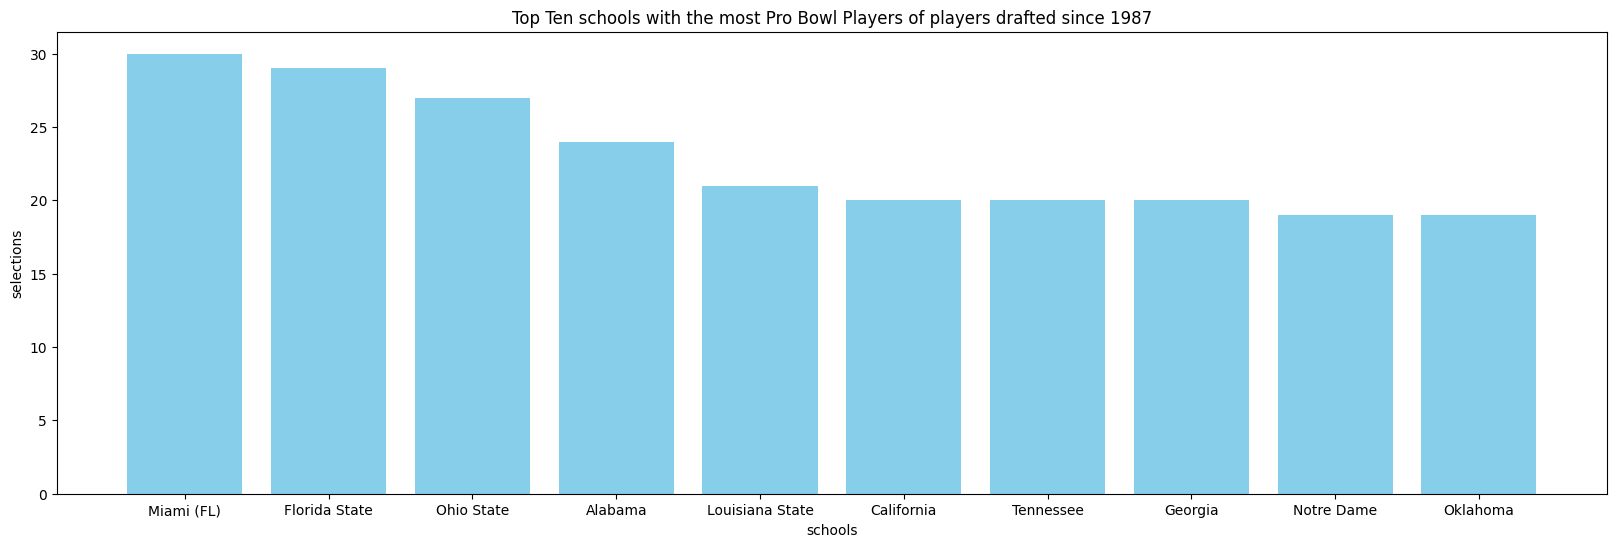

In [18]:
print_top_ten(sorted_items, 'schools', 'selections', 'Top Ten schools with the most Pro Bowl Players of players drafted since 1987')

In [19]:
print(results)

[('[25, 26, 29, 30, 31, 32]', 'Louisville', 'OT', 'Bruce Armstrong'), ('[25, 26, 27]', 'Southern Methodist (TX)', 'DT', 'Jerry Ball'), ('[29]', 'North Carolina', 'C', 'Harris Barton'), ('[34]', 'Notre Dame', 'QB', 'Steve Beuerlein'), ('[25, 26]', 'Miami (FL)', 'DT', 'Jerome Brown'), ('[24, 22, 23, 25]', 'Nicholls State (LA)', 'WR', 'Mark Carrier'), ('[27]', 'Northwestern', 'WR', 'Curtis Duncan'), ('[29]', 'Baylor', 'S', 'Thomas Everett'), ('[34, 35, 36, 37]', 'Delaware', 'QB', 'Rich Gannon'), ('[30, 33, 34]', 'Washington', 'OG', 'Kevin Gogan'), ('[25]', 'Liberty (VA)', 'DB', 'Wayne Haddix'), ('[32]', 'Michigan', 'QB', 'Jim Harbaugh'), ('[27]', 'Washington', 'K', 'Jeff Jaeger'), ('[27, 28, 29]', 'North Carolina State', 'WR', 'Haywood Jeffires'), ('[25]', 'Virginia', 'QB', 'Don Majkowski'), ('[26]', 'Oregon', 'QB', 'Chris Miller'), ('[26]', 'Penn State', 'OG', 'Dan Morgan'), ('[28, 31, 32, 33, 34]', 'California', 'LB', 'Hardy Nickerson'), ('[27, 28]', 'Wisconsin', 'DB', 'Nate Odomes'), (

In [20]:
schools = dict()

for list_of_results in results:
    str_list_of_results, college, pos, *garbage = list_of_results
    int_list_of_results = json.loads(str_list_of_results)

    if college not in schools.keys():

        positions = {
            'DB' : 0,
            'C' : 0,
            'RB' : 0,
            'WR' : 0,
            'DE' : 0,
            'OT' : 0,
            'S' : 0,
            'TE' : 0,
            'DT' : 0, 
            'LB' : 0, 
            'QB' : 0,
            'OG' : 0, 
            'K' : 0
        }

        stats = {
            'POS_count' : positions,
            'sum_of_ages': 0,
            'count_of_selections' : 0,
            'count_of_players' : 0
        }
        
        schools[college] = stats

    schools[college]['POS_count'][pos] +=1
    schools[college]['sum_of_ages'] += sum(int_list_of_results)
    schools[college]['count_of_selections'] += len(int_list_of_results)
    schools[college]['count_of_players'] += 1

In [21]:
print(schools)

{'Louisville': {'POS_count': {'DB': 3, 'C': 1, 'RB': 0, 'WR': 0, 'DE': 2, 'OT': 1, 'S': 0, 'TE': 1, 'DT': 1, 'LB': 0, 'QB': 2, 'OG': 0, 'K': 0}, 'sum_of_ages': 801, 'count_of_selections': 29, 'count_of_players': 11}, 'Southern Methodist (TX)': {'POS_count': {'DB': 0, 'C': 0, 'RB': 0, 'WR': 2, 'DE': 0, 'OT': 0, 'S': 0, 'TE': 0, 'DT': 1, 'LB': 0, 'QB': 0, 'OG': 0, 'K': 1}, 'sum_of_ages': 184, 'count_of_selections': 7, 'count_of_players': 4}, 'North Carolina': {'POS_count': {'DB': 1, 'C': 2, 'RB': 1, 'WR': 0, 'DE': 2, 'OT': 0, 'S': 0, 'TE': 2, 'DT': 0, 'LB': 1, 'QB': 1, 'OG': 1, 'K': 0}, 'sum_of_ages': 635, 'count_of_selections': 22, 'count_of_players': 11}, 'Notre Dame': {'POS_count': {'DB': 2, 'C': 1, 'RB': 2, 'WR': 2, 'DE': 1, 'OT': 2, 'S': 1, 'TE': 2, 'DT': 1, 'LB': 1, 'QB': 1, 'OG': 2, 'K': 1}, 'sum_of_ages': 1576, 'count_of_selections': 58, 'count_of_players': 19}, 'Miami (FL)': {'POS_count': {'DB': 2, 'C': 0, 'RB': 3, 'WR': 5, 'DE': 2, 'OT': 0, 'S': 4, 'TE': 3, 'DT': 5, 'LB': 3, 'Q

In [22]:
schools_age_by_selections = dict()
schools_selection_by_count = dict()

for college in schools.keys():
    if schools[college]['count_of_players'] > 10:
        schools_age_by_selections[college] = schools[college]['sum_of_ages'] / schools[college]['count_of_selections']
        schools_selection_by_count[college] = schools[college]['count_of_selections'] / schools[college]['count_of_players']

In [23]:
print(schools_age_by_selections)

{'Louisville': 27.620689655172413, 'North Carolina': 28.863636363636363, 'Notre Dame': 27.17241379310345, 'Miami (FL)': 28.02020202020202, 'Washington': 27.62162162162162, 'Michigan': 29.76595744680851, 'Virginia': 28.73076923076923, 'Penn State': 27.88888888888889, 'California': 29.19753086419753, 'Wisconsin': 27.227272727272727, 'Louisiana State': 26.753846153846155, 'Maryland': 26.23076923076923, 'UCLA': 27.46153846153846, 'Oklahoma': 26.123076923076923, 'Tennessee': 27.397260273972602, 'Boston College': 27.37837837837838, 'South Carolina': 26.884615384615383, 'Nebraska': 28.095238095238095, 'Ohio State': 26.458333333333332, 'Florida': 26.470588235294116, 'Iowa': 26.925925925925927, 'Texas': 27.857142857142858, 'Florida State': 27.580645161290324, 'Alabama': 25.529411764705884, 'Mississippi': 27.0, 'Clemson': 27.21875, 'Texas A&M': 27.38095238095238, 'Stanford': 27.55263157894737, 'Georgia': 26.75, 'Southern California': 26.482142857142858, 'Auburn': 27.36}


In [24]:
sorted_items = sorted(schools_age_by_selections.items(), key=lambda item: item[1], reverse=False)

# Convert the sorted items back into a dictionary
sorted_dict = dict(sorted_items)
print(sorted_dict)

{'Alabama': 25.529411764705884, 'Oklahoma': 26.123076923076923, 'Maryland': 26.23076923076923, 'Ohio State': 26.458333333333332, 'Florida': 26.470588235294116, 'Southern California': 26.482142857142858, 'Georgia': 26.75, 'Louisiana State': 26.753846153846155, 'South Carolina': 26.884615384615383, 'Iowa': 26.925925925925927, 'Mississippi': 27.0, 'Notre Dame': 27.17241379310345, 'Clemson': 27.21875, 'Wisconsin': 27.227272727272727, 'Auburn': 27.36, 'Boston College': 27.37837837837838, 'Texas A&M': 27.38095238095238, 'Tennessee': 27.397260273972602, 'UCLA': 27.46153846153846, 'Stanford': 27.55263157894737, 'Florida State': 27.580645161290324, 'Louisville': 27.620689655172413, 'Washington': 27.62162162162162, 'Texas': 27.857142857142858, 'Penn State': 27.88888888888889, 'Miami (FL)': 28.02020202020202, 'Nebraska': 28.095238095238095, 'Virginia': 28.73076923076923, 'North Carolina': 28.863636363636363, 'California': 29.19753086419753, 'Michigan': 29.76595744680851}


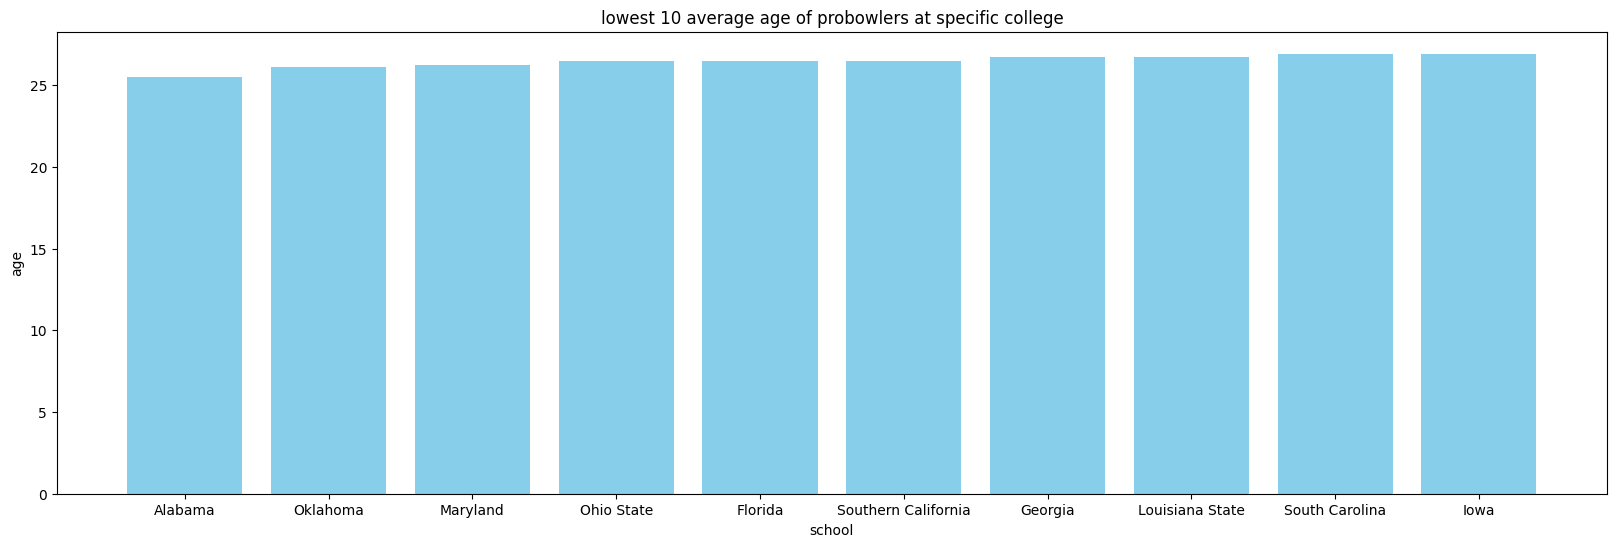

In [25]:
print_top_ten(sorted_items, 'school', 'age', 'lowest 10 average age of probowlers at specific college')

In [26]:
print(schools_selection_by_count)

{'Louisville': 2.6363636363636362, 'North Carolina': 2.0, 'Notre Dame': 3.0526315789473686, 'Miami (FL)': 3.3, 'Washington': 2.642857142857143, 'Michigan': 2.9375, 'Virginia': 2.1666666666666665, 'Penn State': 2.1176470588235294, 'California': 4.05, 'Wisconsin': 3.3846153846153846, 'Louisiana State': 3.0952380952380953, 'Maryland': 2.0, 'UCLA': 2.7857142857142856, 'Oklahoma': 3.4210526315789473, 'Tennessee': 3.65, 'Boston College': 2.466666666666667, 'South Carolina': 2.1666666666666665, 'Nebraska': 3.230769230769231, 'Ohio State': 2.6666666666666665, 'Florida': 2.125, 'Iowa': 2.25, 'Texas': 3.3157894736842106, 'Florida State': 3.206896551724138, 'Alabama': 2.8333333333333335, 'Mississippi': 2.2857142857142856, 'Clemson': 2.4615384615384617, 'Texas A&M': 3.0, 'Stanford': 3.4545454545454546, 'Georgia': 3.2, 'Southern California': 2.9473684210526314, 'Auburn': 1.9230769230769231}


In [27]:
sorted_items = sorted(schools_selection_by_count.items(), key=lambda item: item[1], reverse=True)

# Convert the sorted items back into a dictionary
sorted_dict = dict(sorted_items)
print(sorted_dict)

{'California': 4.05, 'Tennessee': 3.65, 'Stanford': 3.4545454545454546, 'Oklahoma': 3.4210526315789473, 'Wisconsin': 3.3846153846153846, 'Texas': 3.3157894736842106, 'Miami (FL)': 3.3, 'Nebraska': 3.230769230769231, 'Florida State': 3.206896551724138, 'Georgia': 3.2, 'Louisiana State': 3.0952380952380953, 'Notre Dame': 3.0526315789473686, 'Texas A&M': 3.0, 'Southern California': 2.9473684210526314, 'Michigan': 2.9375, 'Alabama': 2.8333333333333335, 'UCLA': 2.7857142857142856, 'Ohio State': 2.6666666666666665, 'Washington': 2.642857142857143, 'Louisville': 2.6363636363636362, 'Boston College': 2.466666666666667, 'Clemson': 2.4615384615384617, 'Mississippi': 2.2857142857142856, 'Iowa': 2.25, 'Virginia': 2.1666666666666665, 'South Carolina': 2.1666666666666665, 'Florida': 2.125, 'Penn State': 2.1176470588235294, 'North Carolina': 2.0, 'Maryland': 2.0, 'Auburn': 1.9230769230769231}


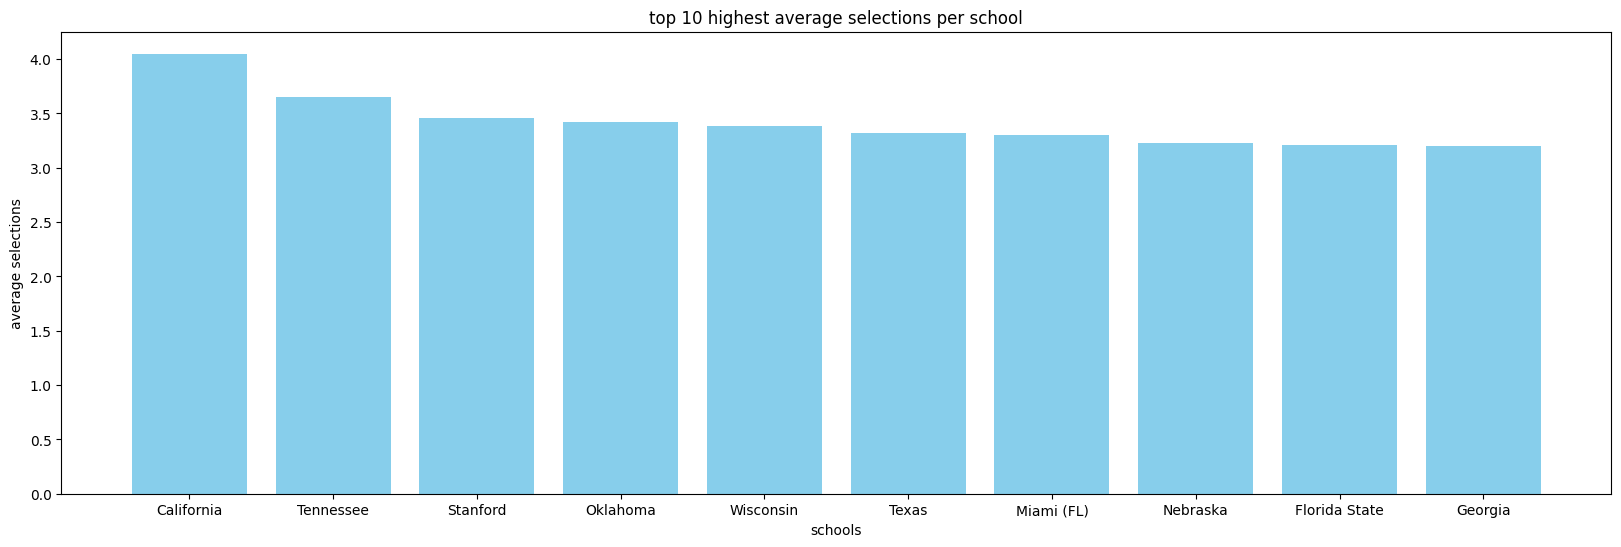

In [28]:
print_top_ten(sorted_items, 'schools', 'average selections', 'top 10 highest average selections per school')

In [29]:
def best_school_per_POS(pos, schools):
    best_school = ''
    second_best_school = ''
    best = 0
    second_best = 0
    for college in schools.keys():
        if schools[college]['POS_count'][pos] > best:
            best = schools[college]['POS_count'][pos]
            best_school = college

        if schools[college]['POS_count'][pos] > second_best and schools[college]['POS_count'][pos] < best:
            second_best = schools[college]['POS_count'][pos]
            second_best_school = college
    return best, second_best, best_school, second_best_school

In [30]:
list_of_pos = ['DB','C','RB','WR','DE','OT','S','TE','DT','LB','QB','OG','K']

for pos in list_of_pos:
    best, second_best, best_school, second_best_school = best_school_per_POS(pos, schools)
    print(pos)
    print('1. ' + best_school + ' ' + str(best))
    print('2. ' + second_best_school + ' ' + str(second_best))

DB
1. Ohio State 5
2. Florida State 4
C
1. Boston College 3
2. Alabama 2
RB
1. Alabama 6
2. Texas 4
WR
1. Miami (FL) 5
2. Louisiana State 4
DE
1. Ohio State 5
2. Florida 3
OT
1. Oklahoma 4
2. Florida State 3
S
1. Miami (FL) 4
2. Louisiana State 3
TE
1. Oklahoma 4
2. Mississippi 3
DT
1. Miami (FL) 5
2. Alabama 3
LB
1. UCLA 6
2. Boston College 5
QB
1. Michigan 3
2. Virginia 2
OG
1. Penn State 3
2. Louisiana State 2
K
1. Texas 2
2. Florida State 1


In [31]:
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

cursor.execute("""
    SELECT `Year`, COUNT(*) as `NumProBowlPlayers`
    FROM nfl_combine_data
    WHERE `ProBowl_Year` != '[]' AND `ProBowl_Year` IS NOT NULL
    GROUP BY `Year`
    ORDER BY `NumProBowlPlayers` DESC
""")

# Fetch all the rows in a list of lists.
results = cursor.fetchall()

cursor.close()
cnx.close()

In [32]:
print(results)

[(2010, 42), (2012, 38), (2005, 36), (2007, 35), (2006, 34), (2013, 33), (2016, 33), (2017, 32), (2015, 31), (2011, 30), (2009, 29), (2003, 29), (2001, 29), (2008, 28), (2014, 28), (2019, 28), (1987, 27), (1988, 27), (1993, 27), (1996, 27), (1997, 27), (2018, 27), (1992, 25), (2004, 23), (1994, 23), (1995, 23), (1998, 22), (1999, 21), (1991, 20), (1990, 20), (1989, 19), (2000, 13), (2002, 13), (2020, 13), (2021, 11)]


In [33]:
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

cursor.execute("""
    SELECT Year, Name, POS, College
    FROM nfl_combine_data
    WHERE `ProBowl_Year` != '[]' AND `Year` = 2010
""")

# Fetch all the rows in a list of lists.
results = cursor.fetchall()

cursor.close()
cnx.close()

In [34]:
print(results)

[(2010, 'Geno Atkins', 'DT', 'Georgia'), (2010, 'Zane Beadles', 'OG', 'Utah'), (2010, 'Eric Berry', 'S', 'Tennessee'), (2010, 'Antonio Brown', 'WR', 'Central Michigan'), (2010, 'Dez Bryant', 'WR', 'Oklahoma State'), (2010, 'Kam Chancellor', 'S', 'Virginia Tech'), (2010, 'Carlos Dunlap', 'DE', 'Florida'), (2010, 'Brandon Graham', 'LB', 'Michigan'), (2010, 'Jimmy Graham', 'TE', 'Miami (FL)'), (2010, 'Jermaine Gresham', 'TE', 'Oklahoma'), (2010, 'Everson Griffen', 'DE', 'Southern California'), (2010, 'Rob Gronkowski', 'TE', 'Arizona'), (2010, 'Joe Haden', 'DB', 'Florida'), (2010, 'Greg Hardy', 'DE', 'Mississippi'), (2010, 'Mike Iupati', 'OG', 'Idaho'), (2010, 'Reshad Jones', 'S', 'Georgia'), (2010, 'Linval Joseph', 'DT', 'East Carolina (NC)'), (2010, 'Sean Lee', 'LB', 'Penn State'), (2010, 'Marc Mariani', 'WR', 'Montana'), (2010, 'Ryan Mathews', 'RB', 'Frenso State (CA)'), (2010, 'Dexter McCluster', 'WR', 'Mississippi'), (2010, 'Devin McCourty', 'DB', 'Rutgers'), (2010, 'Gerald McCoy', 'D

In [35]:
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

cursor.execute("""
    SELECT POS, Height_in, Weight_lbs, Forty_Yard, Bench_Press, Vert_Leap_in, Broad_Jump_in, Shuttle, Three_Cone
    FROM nfl_combine_data
""")

# Fetch all the rows in a list of lists.
results_of_all_players = cursor.fetchall()

cursor.close()
cnx.close()

In [36]:
def create_positions():
    return {
        'DB' : 0,
        'DB_count' : 0,
        'DB_avg' : 0,

        'C' : 0,
        'C_count' : 0,
        'C_avg' : 0,

        'RB' : 0,
        'RB_count' : 0,
        'RB_avg' : 0,

        'WR' : 0,
        'WR_count' : 0,
        'WR_avg' : 0,

        'DE' : 0,
        'DE_count' : 0,
        'DE_avg' : 0,

        'OT' : 0,
        'OT_count' : 0,
        'OT_avg' : 0,

        'S' : 0,
        'S_count' : 0,
        'S_avg' : 0,

        'TE' : 0,
        'TE_count' : 0,
        'TE_avg' : 0,

        'DT' : 0, 
        'DT_count' : 0,
        'DT_avg' : 0,

        'LB' : 0, 
        'LB_count' : 0, 
        'LB_avg' : 0, 

        'QB' : 0,
        'QB_count' : 0,
        'QB_avg' : 0,

        'OG' : 0, 
        'OG_count' : 0,
        'OG_avg' : 0,

        'K' : 0,
        'K_count' : 0,
        'K_avg' : 0
    }

In [37]:
all_players_dict = {
    'Height_in' : create_positions(),
    'Weight_lbs' : create_positions(),
    'Forty_Yard' : create_positions(),
    'Bench_Press' : create_positions(),
    'Vert_Leap_in' : create_positions(),
    'Broad_Jump_in' : create_positions(),
    'Shuttle' : create_positions(),
    'Three_Cone' : create_positions()
}

In [38]:
def retrieve_metric_by_position(dictionary, results):
    for list_of_results in results:
        pos, height, weight, forty, bench, vert, broad, shuttle, three_cone, *garbage = list_of_results

        if height > 0:
            dictionary['Height_in'][pos] = float(round(Decimal(str(dictionary['Height_in'][pos])) + Decimal(str(height)), 2))
            
            dictionary['Height_in'][pos +'_count'] += 1
        if weight > 0:
            dictionary['Weight_lbs'][pos] = float(round(Decimal(str(dictionary['Weight_lbs'][pos])) + Decimal(str(weight)), 2))
            dictionary['Weight_lbs'][pos +'_count'] += 1
        if forty > 0:
            dictionary['Forty_Yard'][pos] = float(round(Decimal(str(dictionary['Forty_Yard'][pos])) + Decimal(str(forty)), 2))
            dictionary['Forty_Yard'][pos +'_count'] += 1
        if bench > 0:
            dictionary['Bench_Press'][pos] = float(round(Decimal(str(dictionary['Bench_Press'][pos])) + Decimal(str(bench)), 2))
            dictionary['Bench_Press'][pos +'_count'] += 1
        if vert > 0:
            dictionary['Vert_Leap_in'][pos] = float(round(Decimal(str(dictionary['Vert_Leap_in'][pos])) + Decimal(str(vert)), 2))
            dictionary['Vert_Leap_in'][pos +'_count'] += 1
        if broad > 0:
            dictionary['Broad_Jump_in'][pos] = float(round(Decimal(str(dictionary['Broad_Jump_in'][pos])) + Decimal(str(broad)), 2))
            dictionary['Broad_Jump_in'][pos +'_count'] += 1
        if shuttle > 0:
            dictionary['Shuttle'][pos] = float(round(Decimal(str(dictionary['Shuttle'][pos])) + Decimal(str(shuttle)), 2))
            dictionary['Shuttle'][pos +'_count'] += 1
        if three_cone > 0:
            dictionary['Three_Cone'][pos] = float(round(Decimal(str(dictionary['Three_Cone'][pos])) + Decimal(str(three_cone)), 2))
            dictionary['Three_Cone'][pos +'_count'] += 1
    return dictionary

In [39]:
all_players_dict = retrieve_metric_by_position(all_players_dict, results_of_all_players)

In [40]:
def retrieve_metric_avg_by_position(dictionary):
    for attribute, positions in dictionary.items():
        for pos, _ in positions.items():
            if pos.endswith('_count') and positions[pos] > 0:
                base_pos = pos[:-6] 
                positions[base_pos + '_avg'] = round(positions[base_pos] / positions[pos], 2)
    return dictionary

In [41]:
all_players_dict = retrieve_metric_avg_by_position(all_players_dict)

In [42]:
print(all_players_dict)

{'Height_in': {'DB': 100138.84, 'DB_count': 1409, 'DB_avg': 71.07, 'C': 32821.29, 'C_count': 436, 'C_avg': 75.28, 'RB': 108983.48, 'RB_count': 1536, 'RB_avg': 70.95, 'WR': 132968.07, 'WR_count': 1836, 'WR_avg': 72.42, 'DE': 81887.78, 'DE_count': 1080, 'DE_avg': 75.82, 'OT': 81733.4, 'OT_count': 1054, 'OT_avg': 77.55, 'S': 77494.51, 'S_count': 1073, 'S_avg': 72.22, 'TE': 60097.18, 'TE_count': 789, 'TE_avg': 76.17, 'DT': 77279.22, 'DT_count': 1031, 'DT_avg': 74.96, 'LB': 123024.53, 'LB_count': 1670, 'LB_avg': 73.67, 'QB': 56360.95, 'QB_count': 755, 'QB_avg': 74.65, 'OG': 64289.64, 'OG_count': 847, 'OG_avg': 75.9, 'K': 24328.44, 'K_count': 334, 'K_avg': 72.84}, 'Weight_lbs': {'DB': 268542.0, 'DB_count': 1409, 'DB_avg': 190.59, 'C': 129961.0, 'C_count': 436, 'C_avg': 298.08, 'RB': 332546.0, 'RB_count': 1536, 'RB_avg': 216.5, 'WR': 361064.0, 'WR_count': 1836, 'WR_avg': 196.66, 'DE': 287407.0, 'DE_count': 1080, 'DE_avg': 266.12, 'OT': 326801.0, 'OT_count': 1054, 'OT_avg': 310.06, 'S': 219214

In [43]:
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

cursor.execute("""
    SELECT POS, Height_in, Weight_lbs, Forty_Yard, Bench_Press, Vert_Leap_in, Broad_Jump_in, Shuttle, Three_Cone
    FROM nfl_combine_data
    WHERE `ProBowl_Year` = '[]'
""")

# Fetch all the rows in a list of lists.
results_of_non_proBowl_players = cursor.fetchall()

cursor.close()
cnx.close()

In [44]:
non_ProBowl_players_dict = {
    'Height_in' : create_positions(),
    'Weight_lbs' : create_positions(),
    'Forty_Yard' : create_positions(),
    'Bench_Press' : create_positions(),
    'Vert_Leap_in' : create_positions(),
    'Broad_Jump_in' : create_positions(),
    'Shuttle' : create_positions(),
    'Three_Cone' : create_positions()
}

In [45]:
non_ProBowl_players_dict = retrieve_metric_by_position(non_ProBowl_players_dict, results_of_non_proBowl_players)
print(non_ProBowl_players_dict)

{'Height_in': {'DB': 93435.33, 'DB_count': 1315, 'DB_avg': 0, 'C': 30260.23, 'C_count': 402, 'C_avg': 0, 'RB': 101038.41, 'RB_count': 1424, 'RB_avg': 0, 'WR': 124852.58, 'WR_count': 1724, 'WR_avg': 0, 'DE': 75878.26, 'DE_count': 1001, 'DE_avg': 0, 'OT': 76390.72, 'OT_count': 985, 'OT_avg': 0, 'S': 73016.07, 'S_count': 1011, 'S_avg': 0, 'TE': 56045.7, 'TE_count': 736, 'TE_avg': 0, 'DT': 73000.88, 'DT_count': 974, 'DT_avg': 0, 'LB': 115101.5, 'LB_count': 1563, 'LB_avg': 0, 'QB': 51407.35, 'QB_count': 689, 'QB_avg': 0, 'OG': 60483.64, 'OG_count': 797, 'OG_avg': 0, 'K': 22286.0, 'K_count': 306, 'K_avg': 0}, 'Weight_lbs': {'DB': 250327.0, 'DB_count': 1315, 'DB_avg': 0, 'C': 119705.0, 'C_count': 402, 'C_avg': 0, 'RB': 308237.0, 'RB_count': 1424, 'RB_avg': 0, 'WR': 338628.0, 'WR_count': 1724, 'WR_avg': 0, 'DE': 266285.0, 'DE_count': 1001, 'DE_avg': 0, 'OT': 304957.0, 'OT_count': 985, 'OT_avg': 0, 'S': 206443.0, 'S_count': 1011, 'S_avg': 0, 'TE': 184900.0, 'TE_count': 736, 'TE_avg': 0, 'DT': 2

In [46]:
non_ProBowl_players_dict = retrieve_metric_avg_by_position(non_ProBowl_players_dict)
print(non_ProBowl_players_dict)

{'Height_in': {'DB': 93435.33, 'DB_count': 1315, 'DB_avg': 71.05, 'C': 30260.23, 'C_count': 402, 'C_avg': 75.27, 'RB': 101038.41, 'RB_count': 1424, 'RB_avg': 70.95, 'WR': 124852.58, 'WR_count': 1724, 'WR_avg': 72.42, 'DE': 75878.26, 'DE_count': 1001, 'DE_avg': 75.8, 'OT': 76390.72, 'OT_count': 985, 'OT_avg': 77.55, 'S': 73016.07, 'S_count': 1011, 'S_avg': 72.22, 'TE': 56045.7, 'TE_count': 736, 'TE_avg': 76.15, 'DT': 73000.88, 'DT_count': 974, 'DT_avg': 74.95, 'LB': 115101.5, 'LB_count': 1563, 'LB_avg': 73.64, 'QB': 51407.35, 'QB_count': 689, 'QB_avg': 74.61, 'OG': 60483.64, 'OG_count': 797, 'OG_avg': 75.89, 'K': 22286.0, 'K_count': 306, 'K_avg': 72.83}, 'Weight_lbs': {'DB': 250327.0, 'DB_count': 1315, 'DB_avg': 190.36, 'C': 119705.0, 'C_count': 402, 'C_avg': 297.77, 'RB': 308237.0, 'RB_count': 1424, 'RB_avg': 216.46, 'WR': 338628.0, 'WR_count': 1724, 'WR_avg': 196.42, 'DE': 266285.0, 'DE_count': 1001, 'DE_avg': 266.02, 'OT': 304957.0, 'OT_count': 985, 'OT_avg': 309.6, 'S': 206443.0, 'S

In [47]:
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

cursor.execute("""
    SELECT POS, Height_in, Weight_lbs, Forty_Yard, Bench_Press, Vert_Leap_in, Broad_Jump_in, Shuttle, Three_Cone
    FROM nfl_combine_data
    WHERE `ProBowl_Year` != '[]'
""")

# Fetch all the rows in a list of lists.
results_of_proBowl_players = cursor.fetchall()

cursor.close()
cnx.close()

In [48]:
ProBowl_players_dict = {
    'Height_in' : create_positions(),
    'Weight_lbs' : create_positions(),
    'Forty_Yard' : create_positions(),
    'Bench_Press' : create_positions(),
    'Vert_Leap_in' : create_positions(),
    'Broad_Jump_in' : create_positions(),
    'Shuttle' : create_positions(),
    'Three_Cone' : create_positions()
}

In [49]:
ProBowl_players_dict = retrieve_metric_by_position(ProBowl_players_dict, results_of_proBowl_players)
print(ProBowl_players_dict)

{'Height_in': {'DB': 6703.51, 'DB_count': 94, 'DB_avg': 0, 'C': 2561.06, 'C_count': 34, 'C_avg': 0, 'RB': 7945.07, 'RB_count': 112, 'RB_avg': 0, 'WR': 8115.49, 'WR_count': 112, 'WR_avg': 0, 'DE': 6009.52, 'DE_count': 79, 'DE_avg': 0, 'OT': 5342.68, 'OT_count': 69, 'OT_avg': 0, 'S': 4478.44, 'S_count': 62, 'S_avg': 0, 'TE': 4051.48, 'TE_count': 53, 'TE_avg': 0, 'DT': 4278.34, 'DT_count': 57, 'DT_avg': 0, 'LB': 7923.03, 'LB_count': 107, 'LB_avg': 0, 'QB': 4953.6, 'QB_count': 66, 'QB_avg': 0, 'OG': 3806.0, 'OG_count': 50, 'OG_avg': 0, 'K': 2042.44, 'K_count': 28, 'K_avg': 0}, 'Weight_lbs': {'DB': 18215.0, 'DB_count': 94, 'DB_avg': 0, 'C': 10256.0, 'C_count': 34, 'C_avg': 0, 'RB': 24309.0, 'RB_count': 112, 'RB_avg': 0, 'WR': 22436.0, 'WR_count': 112, 'WR_avg': 0, 'DE': 21122.0, 'DE_count': 79, 'DE_avg': 0, 'OT': 21844.0, 'OT_count': 69, 'OT_avg': 0, 'S': 12771.0, 'S_count': 62, 'S_avg': 0, 'TE': 13407.0, 'TE_count': 53, 'TE_avg': 0, 'DT': 17308.0, 'DT_count': 57, 'DT_avg': 0, 'LB': 25632.0

In [50]:
ProBowl_players_dict = retrieve_metric_avg_by_position(ProBowl_players_dict)
print(ProBowl_players_dict)

{'Height_in': {'DB': 6703.51, 'DB_count': 94, 'DB_avg': 71.31, 'C': 2561.06, 'C_count': 34, 'C_avg': 75.33, 'RB': 7945.07, 'RB_count': 112, 'RB_avg': 70.94, 'WR': 8115.49, 'WR_count': 112, 'WR_avg': 72.46, 'DE': 6009.52, 'DE_count': 79, 'DE_avg': 76.07, 'OT': 5342.68, 'OT_count': 69, 'OT_avg': 77.43, 'S': 4478.44, 'S_count': 62, 'S_avg': 72.23, 'TE': 4051.48, 'TE_count': 53, 'TE_avg': 76.44, 'DT': 4278.34, 'DT_count': 57, 'DT_avg': 75.06, 'LB': 7923.03, 'LB_count': 107, 'LB_avg': 74.05, 'QB': 4953.6, 'QB_count': 66, 'QB_avg': 75.05, 'OG': 3806.0, 'OG_count': 50, 'OG_avg': 76.12, 'K': 2042.44, 'K_count': 28, 'K_avg': 72.94}, 'Weight_lbs': {'DB': 18215.0, 'DB_count': 94, 'DB_avg': 193.78, 'C': 10256.0, 'C_count': 34, 'C_avg': 301.65, 'RB': 24309.0, 'RB_count': 112, 'RB_avg': 217.04, 'WR': 22436.0, 'WR_count': 112, 'WR_avg': 200.32, 'DE': 21122.0, 'DE_count': 79, 'DE_avg': 267.37, 'OT': 21844.0, 'OT_count': 69, 'OT_avg': 316.58, 'S': 12771.0, 'S_count': 62, 'S_avg': 205.98, 'TE': 13407.0,

In [51]:
print(ProBowl_players_dict)
print(non_ProBowl_players_dict)
print(all_players_dict)

{'Height_in': {'DB': 6703.51, 'DB_count': 94, 'DB_avg': 71.31, 'C': 2561.06, 'C_count': 34, 'C_avg': 75.33, 'RB': 7945.07, 'RB_count': 112, 'RB_avg': 70.94, 'WR': 8115.49, 'WR_count': 112, 'WR_avg': 72.46, 'DE': 6009.52, 'DE_count': 79, 'DE_avg': 76.07, 'OT': 5342.68, 'OT_count': 69, 'OT_avg': 77.43, 'S': 4478.44, 'S_count': 62, 'S_avg': 72.23, 'TE': 4051.48, 'TE_count': 53, 'TE_avg': 76.44, 'DT': 4278.34, 'DT_count': 57, 'DT_avg': 75.06, 'LB': 7923.03, 'LB_count': 107, 'LB_avg': 74.05, 'QB': 4953.6, 'QB_count': 66, 'QB_avg': 75.05, 'OG': 3806.0, 'OG_count': 50, 'OG_avg': 76.12, 'K': 2042.44, 'K_count': 28, 'K_avg': 72.94}, 'Weight_lbs': {'DB': 18215.0, 'DB_count': 94, 'DB_avg': 193.78, 'C': 10256.0, 'C_count': 34, 'C_avg': 301.65, 'RB': 24309.0, 'RB_count': 112, 'RB_avg': 217.04, 'WR': 22436.0, 'WR_count': 112, 'WR_avg': 200.32, 'DE': 21122.0, 'DE_count': 79, 'DE_avg': 267.37, 'OT': 21844.0, 'OT_count': 69, 'OT_avg': 316.58, 'S': 12771.0, 'S_count': 62, 'S_avg': 205.98, 'TE': 13407.0,

In [52]:
def compare_averages(*dicts):
    # Initialize a dictionary to hold the comparisons
    comparisons = {}
    
    # Assuming the structure and metrics are the same across all dictionaries
    for metric in dicts[0]:  # Loop through each metric (e.g., 'Height_in', 'Weight_lbs')
        comparisons[metric] = {}
        
        # Loop through each position within the metric, assuming positions are the same across all dictionaries
        for pos in dicts[0][metric]:
            if pos.endswith('_avg'):  # We are only interested in averages
                # Extract and store the averages for this position across all dictionaries
                comparisons[metric][pos] = [d[metric].get(pos) for d in dicts]
                
    return comparisons

# Now, use the function to compare the average values across the three dictionaries
comparison = compare_averages(ProBowl_players_dict, non_ProBowl_players_dict, all_players_dict)
%store comparison

Stored 'comparison' (dict)


In [53]:
df = pd.read_csv('../Data_wrangling/csv_files/all_players.csv')

In [54]:
df['ProBowl'] = df['ProBowl_Age'].apply(lambda x: 1 if x!='[]' else 0)

In [55]:
print(df.head(10))

   Year              Name               College POS  Height (in)  \
0  1987        Mike Adams         Arizona State  DB         69.8   
1  1987      John Adickes                Baylor   C         74.8   
2  1987        Tommy Agee                Auburn  RB         71.8   
3  1987   David Alexander            Tulsa (OK)   C         75.0   
4  1987     Lyneal Alston  Southern Mississippi  WR         72.1   
5  1987      Steve Alvord            Washington  DE         76.5   
6  1987  Anthony Anderson  Grambling State (LA)  DB         73.6   
7  1987    Joe Armentrout             Wisconsin  RB         72.3   
8  1987   Bruce Armstrong            Louisville  OT         76.0   
9  1987       Gene Atkins           Florida A&M   S         71.3   

   Weight (lbs)  Wonderlic  40 Yard  Bench Press  Vert Leap (in)  \
0         198.0        0.0     4.42         13.0            32.0   
1         266.0        0.0     4.97         25.0            26.5   
2         217.0        0.0     0.00         15.

In [56]:
#df.to_csv('../Expolratory_data_analysis/csv_files/all_players.csv', index=False)

In [57]:
df.describe()

,Year,Height (in),Weight (lbs),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,ProBowl
count,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000
mean,2006.507004,73.747822,240.121155,0.748231,4.294843,14.421949,27.749300,96.474585,3.470773,4.328300,0.066643
std,10.737058,2.650708,45.153747,4.385456,1.518621,10.420837,11.869224,41.299084,1.829272,3.607624,0.249411
min,1987.000000,61.500000,142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,71.880000,203.000000,0.000000,4.520000,0.000000,27.000000,101.000000,4.050000,0.000000,0.000000
50%,2008.000000,74.000000,231.500000,0.000000,4.690000,17.000000,31.500000,112.000000,4.300000,6.910000,0.000000
75%,2016.000000,75.750000,275.000000,0.000000,4.970000,22.000000,34.500000,119.000000,4.520000,7.310000,0.000000
max,2023.000000,82.400000,387.000000,48.000000,6.120000,74.000000,46.500000,147.000000,7.200000,9.610000,1.000000
